# Mašinsko Učenje

<h3>Milan Stanković br. ind. 1407</h3>
<h3> Aleksandar Stamenković br. ind. 1403</h3>

Univerzitet u Nišu <br>
Elektronski Fakultet

Studijski program: Računarstvo i Informatika<br>
Modul: Bezbednost Računarskih Sistema<br>
Predmet: Mašinsko Učenje<br>



# Uvod

<h2> Heart disease</h2>
<h3> Informacije o datasetu: </h3>

<a>Link: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data </a>

<p> Ovo je multivarijantni tip skupa podataka koji podrazumeva obezbeđivanje ili uključivanje niza zasebnih matematičkih ili statističkih varijabli, multivarijantnu analizu numeričkih podataka. Sastoji se od 14 atributa koji su starost, pol, tip bola u grudima, krvni pritisak u mirovanju, serumski holesterol, šećer u krvi natašte, rezultati elektrokardiografije u mirovanju, postignuti maksimalni broj otkucaja srca, angina izazvana vežbanjem, stari vrhunac — ST depresija izazvana vežbanjem u odnosu na odmor, nagib vrha vežbe ST segment, broj velikih krvnih sudova i talasemija. Ova baza podataka obuhvata 76 atributa, ali sve objavljene studije se odnose na korišćenje podskupa od njih 14. Baza podataka Klivlenda je jedina koju su do danas koristili istraživači ML. Jedan od glavnih zadataka ovog skupa podataka je predviđanje na osnovu datih atributa pacijenta da li ta određena osoba ima srčano oboljenje ili ne, a drugi je eksperimentalni zadatak da se dijagnostikuje i sazna različite uvide iz ovog skupa podataka koji bi mogli pomoći u razumevanju problem više. </p>

<h3> Atributi: </h3>

1. id (Unique id for each patient)
2. age (Age of the patient in years)
3. origin (place of study)
4. sex (Male/Female)
5. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. chol (serum cholesterol in mg/dl)
8. fbs (if fasting blood sugar > 120 mg/dl)
9. restecg (resting electrocardiographic results) -- Values: [normal, stt abnormality, lv hypertrophy]
10. thalach: maximum heart rate achieved
11. exang: exercise-induced angina (True/ False)
12. oldpeak: ST depression induced by exercise relative to rest
13. slope: the slope of the peak exercise ST segment
14. ca: number of major vessels (0-3) colored by fluoroscopy
15. thal: [normal; fixed defect; reversible defect]
16. num: the predicted attribute



# 1. Importovanje biblioteka i učitavanje dataseta

In [1]:
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import collections
from pprint import pprint
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
app_df = pd.read_csv("./data/heart_disease_uci.csv")
app_df.drop('id', axis='columns', inplace=True)
app_df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# 2. Predprocesiranje

## 2.1. Tipovi podataka

In [3]:
app_df.dtypes

age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [4]:
for c in app_df.select_dtypes(include=['object']).columns:
    print("Unique values in {}: {}, count: {}".format(c, app_df[c].unique(), len(app_df[c].unique())))

Unique values in sex: ['Male' 'Female'], count: 2
Unique values in dataset: ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach'], count: 4
Unique values in cp: ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina'], count: 4
Unique values in fbs: [True False nan], count: 3
Unique values in restecg: ['lv hypertrophy' 'normal' 'st-t abnormality' nan], count: 4
Unique values in exang: [False True nan], count: 3
Unique values in slope: ['downsloping' 'flat' 'upsloping' nan], count: 4
Unique values in thal: ['fixed defect' 'normal' 'reversable defect' nan], count: 4


In [5]:
app_df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


## 2.2 Provera nedostajućih (null) vrednosti

In [6]:
app_df.isnull().any()

age         False
sex         False
dataset     False
cp          False
trestbps     True
chol         True
fbs          True
restecg      True
thalch       True
exang        True
oldpeak      True
slope        True
ca           True
thal         True
num         False
dtype: bool

In [7]:
app_df

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


## 2.3. Provera duplikata


In [8]:
duplicates = app_df.duplicated().sum()
duplicates

2

In [9]:
app_df.dtypes

age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

# 3. Statistika podataka
## 3.1 Opis dataseta

Numeric features:  ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


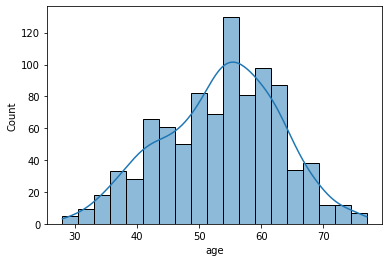

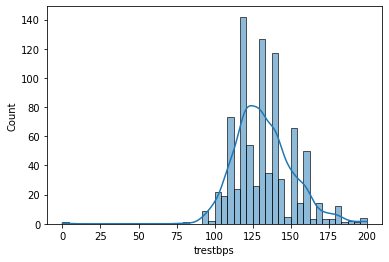

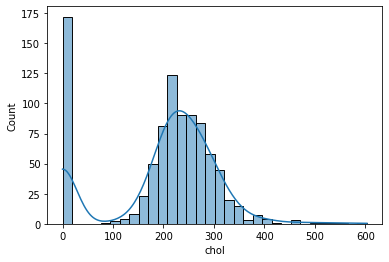

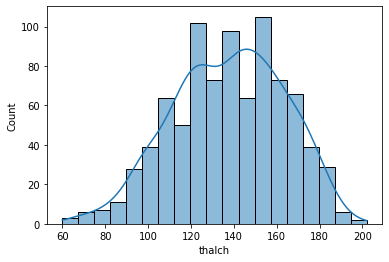

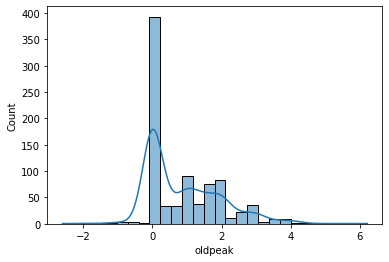

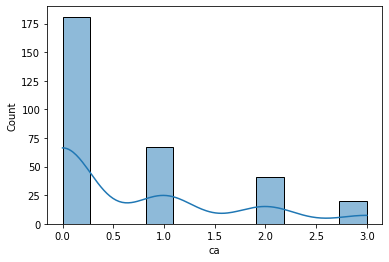

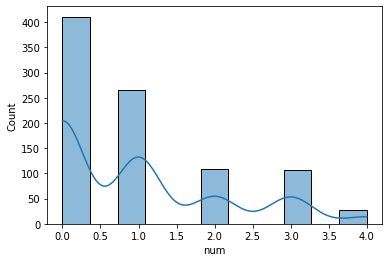

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
numerical_features = app_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print('Numeric features: ',numerical_features)

for col in numerical_features:
    plt.figure()
    sns.histplot(data=app_df, x=col, kde=True)

## 3.2 Brisanje redova koji sadrže NaN vrednosti

In [11]:
app_df1 = app_df.dropna()
app_df1

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,68,Male,Cleveland,asymptomatic,144.0,193.0,True,normal,141.0,False,3.4,flat,2.0,reversable defect,2
300,57,Male,Cleveland,asymptomatic,130.0,131.0,False,normal,115.0,True,1.2,flat,1.0,reversable defect,3
301,57,Female,Cleveland,atypical angina,130.0,236.0,False,lv hypertrophy,174.0,False,0.0,flat,1.0,normal,1
508,47,Male,Hungary,asymptomatic,150.0,226.0,False,normal,98.0,True,1.5,flat,0.0,reversable defect,1


In [12]:
app_df1.isnull().any()

age         False
sex         False
dataset     False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalch      False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
num         False
dtype: bool

## 3.3 Izdvajanje nenumeričkih parametara

In [13]:
#app_df1.drop(['fbs','exang'], axis='columns', inplace=True)
categorical_features = app_df1.select_dtypes(exclude='number').columns.tolist()
print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

%matplotlib inline
import matplotlib.pyplot as plt


#for col in categorical_features:
    #plt.figure()
    #sns.histplot(data=app_df1, x=col)

There are 8 categorical features: 

['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


## 3.4 Korelaciona matrica podataka

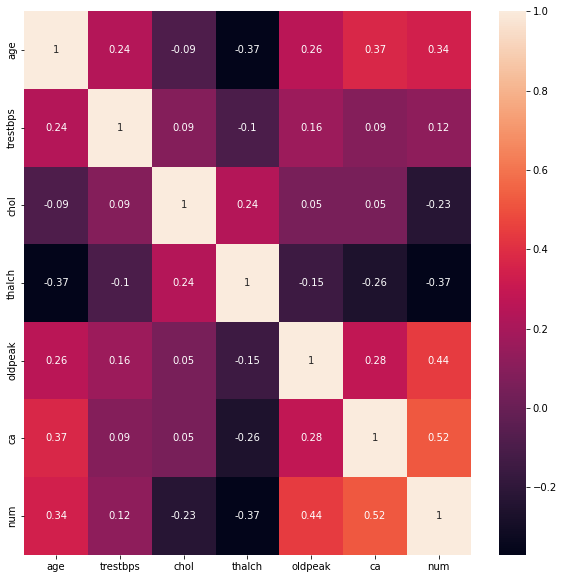

In [14]:
#sns.heatmap(app_df.corr(), square=True)
fig, ax = plt.subplots(figsize=(10, 10))
correlation_matrix = app_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

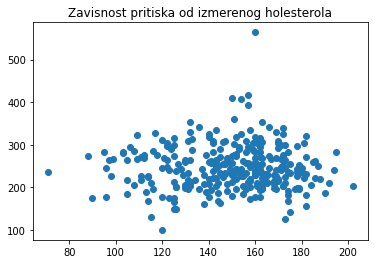

In [15]:
plt.title('Zavisnost pritiska od izmerenog holesterola')
plt.scatter( app_df1['thalch'], app_df1['chol'])

# 4. Algoritmi klasterizacije

## 4.1 Priprema podataka - konvertovanje enumeracija u numeričke vrednosti

In [16]:
import warnings
warnings.filterwarnings('ignore')
app_df1['sex'].replace(['Male', 'Female'], [0, 1], inplace=True)
app_df1['cp'].replace(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'], [0, 1, 2, 3], inplace=True)
#app_df1['fbs'].replace([True, False], [1, 0], inplace=True)
app_df1['restecg'].replace(['lv hypertrophy', 'normal', 'st-t abnormality'], [0, 1, 2], inplace=True)
app_df1['slope'].replace(['downsloping', 'flat', 'upsloping'], [0, 1, 2], inplace=True)
app_df1['thal'].replace(['fixed defect', 'normal', 'reversable defect'], [0, 1, 2], inplace=True)

app_df1

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,0,Cleveland,0,145.0,233.0,True,0,150.0,False,2.3,0,0.0,0,0
1,67,0,Cleveland,1,160.0,286.0,False,0,108.0,True,1.5,1,3.0,1,2
2,67,0,Cleveland,1,120.0,229.0,False,0,129.0,True,2.6,1,2.0,2,1
3,37,0,Cleveland,2,130.0,250.0,False,1,187.0,False,3.5,0,0.0,1,0
4,41,1,Cleveland,3,130.0,204.0,False,0,172.0,False,1.4,2,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,68,0,Cleveland,1,144.0,193.0,True,1,141.0,False,3.4,1,2.0,2,2
300,57,0,Cleveland,1,130.0,131.0,False,1,115.0,True,1.2,1,1.0,2,3
301,57,1,Cleveland,3,130.0,236.0,False,0,174.0,False,0.0,1,1.0,1,1
508,47,0,Hungary,1,150.0,226.0,False,1,98.0,True,1.5,1,0.0,2,1


In [17]:
km_df =  app_df1[['age',
            'trestbps',
            'chol', 
            'thalch',
            'oldpeak', 
            'ca', 
            'fbs',
            'restecg',
            'slope',
            'thal',
            'fbs',
            'exang']]
km_df

,age,trestbps,chol,thalch,oldpeak,ca,fbs,restecg,slope,thal,fbs,exang
0,63,145.0,233.0,150.0,2.3,0.0,True,0,0,0,True,False
1,67,160.0,286.0,108.0,1.5,3.0,False,0,1,1,False,True
2,67,120.0,229.0,129.0,2.6,2.0,False,0,1,2,False,True
3,37,130.0,250.0,187.0,3.5,0.0,False,1,0,1,False,False
4,41,130.0,204.0,172.0,1.4,0.0,False,0,2,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
299,68,144.0,193.0,141.0,3.4,2.0,True,1,1,2,True,False
300,57,130.0,131.0,115.0,1.2,1.0,False,1,1,2,False,True
301,57,130.0,236.0,174.0,0.0,1.0,False,0,1,1,False,False
508,47,150.0,226.0,98.0,1.5,0.0,False,1,1,2,False,True


## 4.2 Kreiranje tabele rezultata

In [18]:
import sklearn.metrics as metrics
result_table = pd.DataFrame({'name': ['Silhouette score:', 'Calinski harabasz score', 'Davies Bouldin score']})
def AppendToResultTable(model, name, data):
    append_data = pd.DataFrame({ name: [metrics.silhouette_score(data, model.labels_), 
                                        metrics.calinski_harabasz_score(data, model.labels_), 
                                        metrics.davies_bouldin_score(data, model.labels_)]})
    global result_table
    result_table = result_table.join(append_data)

## 4.3 KMeans algoritam

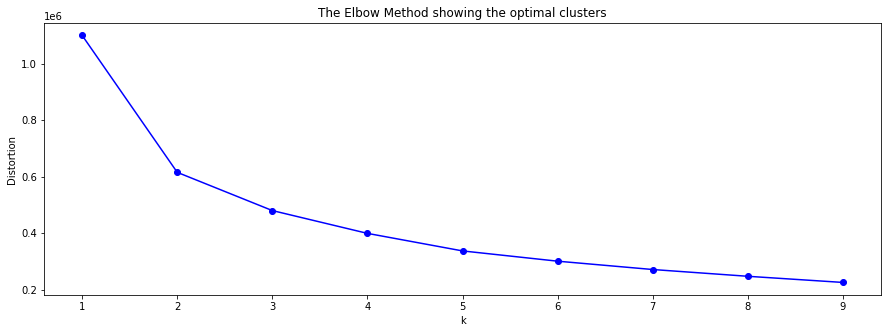

In [19]:
x = km_df.iloc[:, :]
x  = np.array(x)

# Collecting the distortions into list
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x)
    distortions.append(kmeanModel.inertia_)
    
# Plotting the distortions
plt.figure(figsize=(15,5))
plt.plot(K, distortions, 'bo-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal clusters')
plt.show()

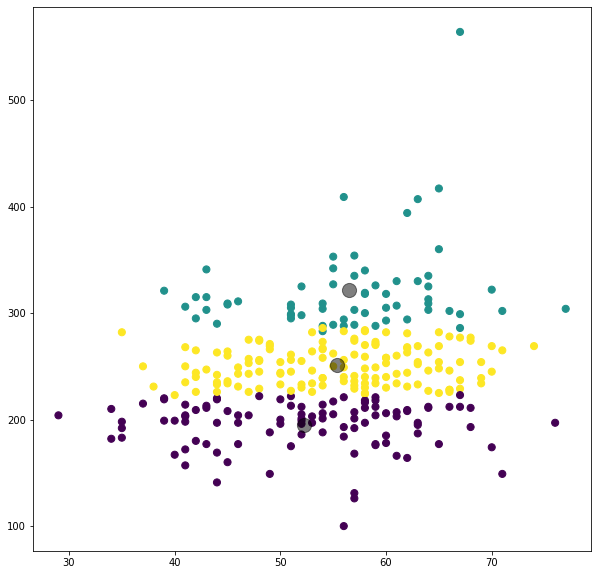

In [20]:
X = km_df
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
res_kmeans = kmeans.predict(X)

AppendToResultTable(kmeanModel, 'KMeans', x)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plt.scatter(X.iloc[:, 0], X.iloc[:, 2], c=res_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='black', s=200, alpha=0.5);
plt.show()

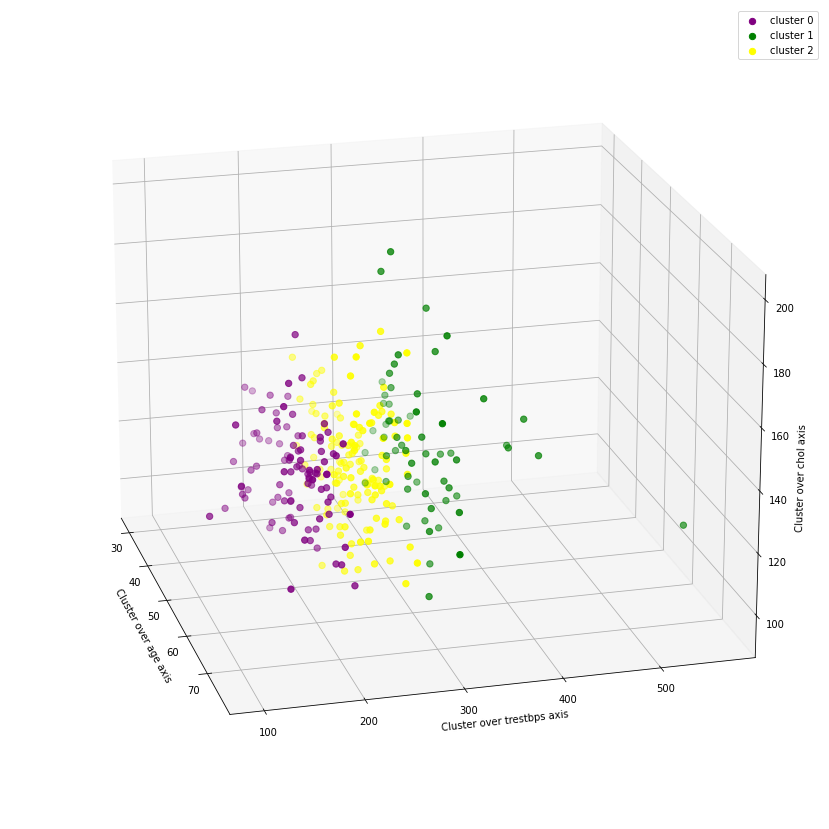

In [21]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[res_kmeans == 0,0],x[res_kmeans == 0,2],x[res_kmeans == 0,1], s = 40 , color = 'purple', label = "cluster 0")
ax.scatter(x[res_kmeans == 1,0],x[res_kmeans == 1,2],x[res_kmeans == 1,1], s = 40 , color = 'green', label = "cluster 1")
ax.scatter(x[res_kmeans == 2,0],x[res_kmeans == 2,2],x[res_kmeans == 2,1], s = 40 , color = 'yellow', label = "cluster 2")
ax.set_xlabel('Cluster over age axis')
ax.set_zlabel('Cluster over chol axis')
ax.set_ylabel('Cluster over trestbps axis')
ax.legend()
for angle in range(0, 360):
    ax.view_init(20, -15)

plt.show()

In [22]:
print(f'Silhouette Score(n=3): {silhouette_score(X, res_kmeans)}')

Silhouette Score(n=3): 0.28371289932858257


## 4.4 Agglomerative Clustering

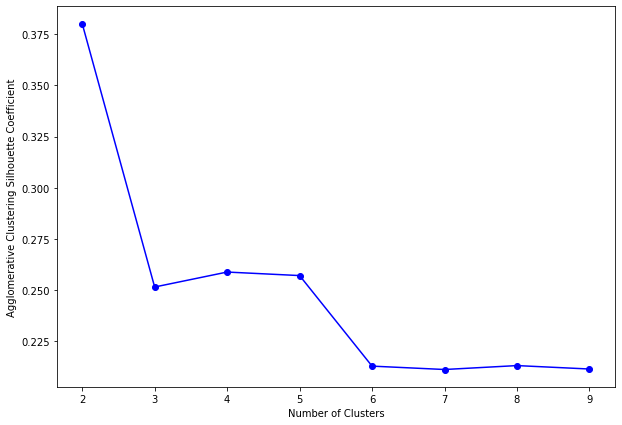

In [23]:
sil_array = []
a_range = 10
for k in range(2, a_range):
    hcluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(X)
    sil_array.append(silhouette_score(X, hcluster.labels_, metric = "euclidean"))

plt.figure(figsize=(10, 7))
plt.plot(range(2, 10), sil_array, 'bo-')
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Agglomerative Clustering Silhouette Coefficient")
plt.show()

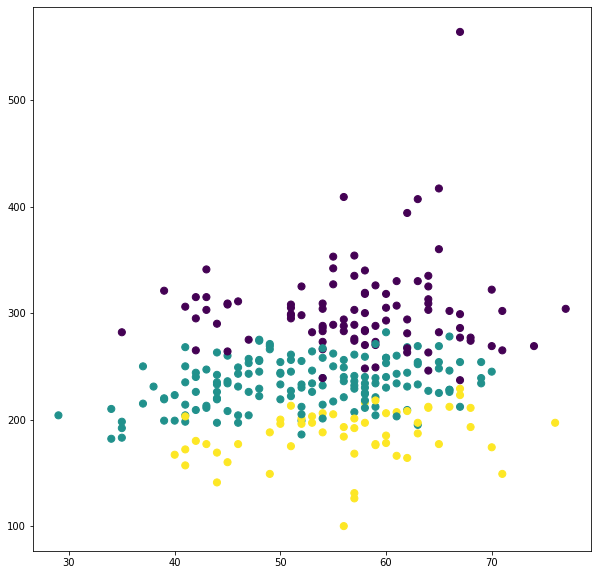

In [24]:
#hcluster_fin = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward').fit(store_data_x_array_pca_95)
hcluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(X)
res_hcluster = hcluster.labels_

AppendToResultTable(hcluster, 'AgglomerativeClustering', x)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plt.scatter(X.iloc[:, 0], X.iloc[:, 2], c=res_hcluster, s=50, cmap='viridis')

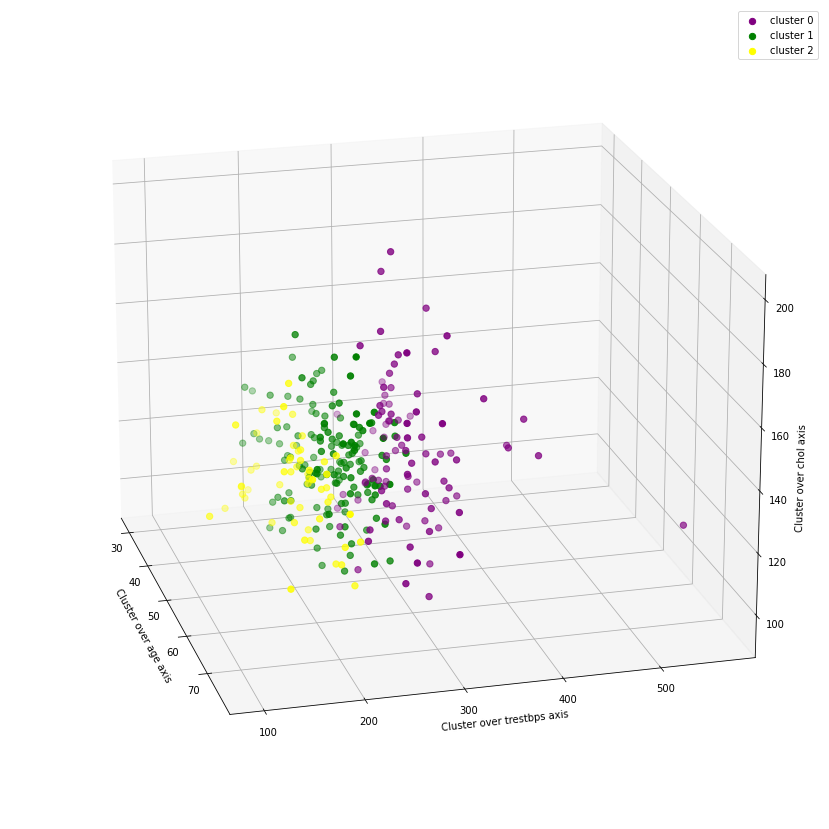

In [25]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[res_hcluster == 0,0],x[res_hcluster == 0,2],x[res_hcluster == 0,1], s = 40 , color = 'purple', label = "cluster 0")
ax.scatter(x[res_hcluster == 1,0],x[res_hcluster == 1,2],x[res_hcluster == 1,1], s = 40 , color = 'green', label = "cluster 1")
ax.scatter(x[res_hcluster == 2,0],x[res_hcluster == 2,2],x[res_hcluster == 2,1], s = 40 , color = 'yellow', label = "cluster 2")
ax.set_xlabel('Cluster over age axis')
ax.set_zlabel('Cluster over chol axis')
ax.set_ylabel('Cluster over trestbps axis')
ax.legend()
for angle in range(0, 360):
    ax.view_init(20, -15)

plt.show()

In [26]:
print(f'Silhouette Score(n=3): {silhouette_score(X, res_hcluster, metric = "euclidean")}')

Silhouette Score(n=3): 0.25137694038081804


## 4.5 MiniBatch KMeans algoritam

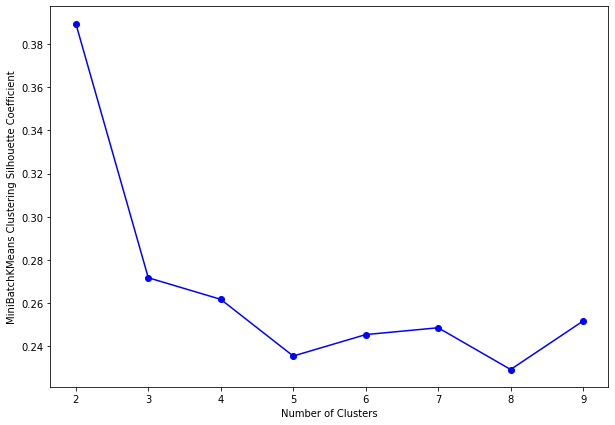

In [27]:
sil_array = []
a_range = 10
for k in range(2, a_range):
    miniBatch = MiniBatchKMeans(n_clusters=k).fit(X)
    sil_array.append(silhouette_score(X, miniBatch.labels_, metric = "euclidean"))

plt.figure(figsize=(10, 7))
plt.plot(range(2, 10), sil_array, 'bo-')
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("MiniBatchKMeans Clustering Silhouette Coefficient")
plt.show()


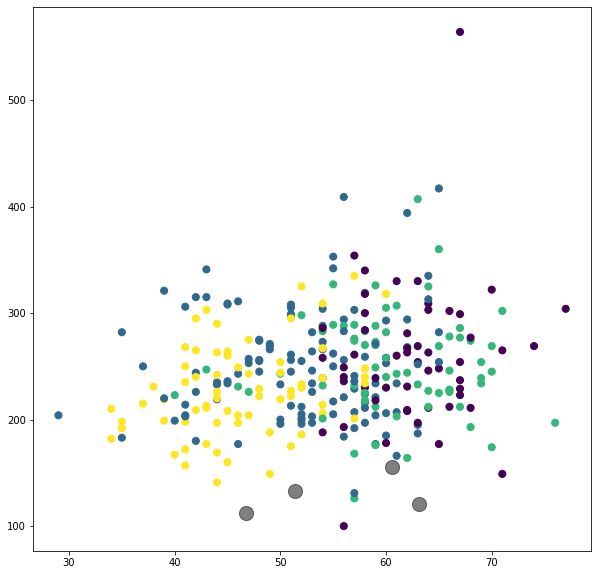

In [28]:
miniBatch = MiniBatchKMeans(n_clusters=4)
miniBatch.fit(X.iloc[:,:2])
res_miniBatch = miniBatch.labels_
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plt.scatter(X.iloc[:, 0], X.iloc[:, 2], c=res_miniBatch, s=50, cmap='viridis')

AppendToResultTable(miniBatch, 'MiniBatch_KMeans', x)

centers = miniBatch.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

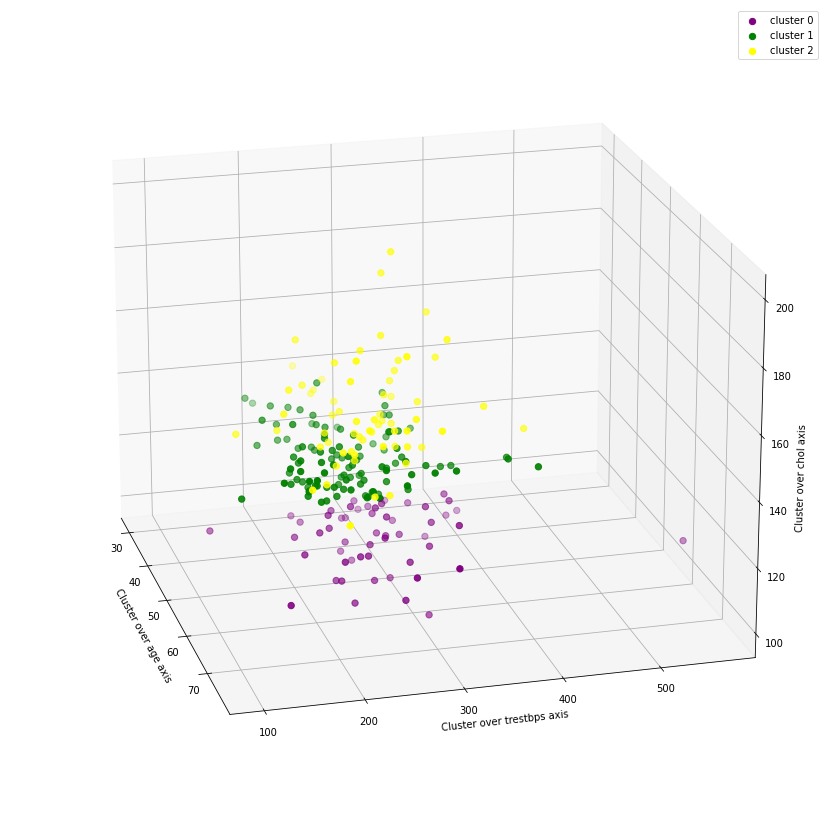

In [29]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[res_miniBatch == 0,0],x[res_miniBatch == 0,2],x[res_miniBatch == 0,1], s = 40 , color = 'purple', label = "cluster 0")
ax.scatter(x[res_miniBatch == 1,0],x[res_miniBatch == 1,2],x[res_miniBatch == 1,1], s = 40 , color = 'green', label = "cluster 1")
ax.scatter(x[res_miniBatch == 2,0],x[res_miniBatch == 2,2],x[res_miniBatch == 2,1], s = 40 , color = 'yellow', label = "cluster 2")
ax.set_xlabel('Cluster over age axis')
ax.set_zlabel('Cluster over chol axis')
ax.set_ylabel('Cluster over trestbps axis')
ax.legend()
for angle in range(0, 360):
    ax.view_init(20, -15)

plt.show()

In [30]:
print(f'Silhouette Score(n=4): {silhouette_score(X, res_miniBatch, metric = "euclidean")}')

Silhouette Score(n=4): 0.022480540466198


## 4.6 MeanShift algoritam

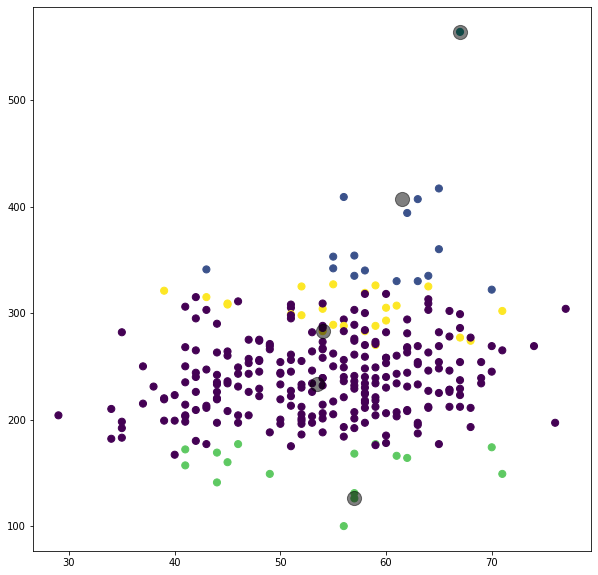

In [31]:
sil_array = []

meanShift = MeanShift(bandwidth = 40).fit(X)
res_meanshift = meanShift.labels_

AppendToResultTable(meanShift, 'MeanShift', x)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plt.scatter(X.iloc[:, 0], X.iloc[:, 2], c=res_meanshift, s=50, cmap='viridis')


centers = meanShift.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='black', s=200, alpha=0.5);
plt.show()

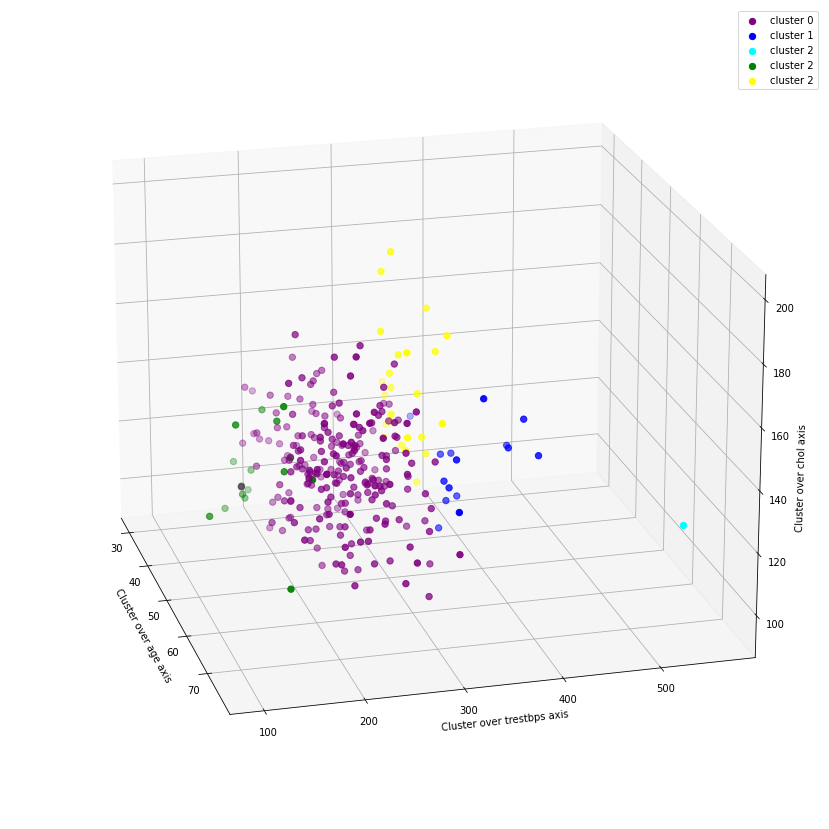

In [32]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[res_meanshift == 0,0],x[res_meanshift == 0,2],x[res_meanshift == 0,1], s = 40 , color = 'purple', label = "cluster 0")
ax.scatter(x[res_meanshift == 1,0],x[res_meanshift == 1,2],x[res_meanshift == 1,1], s = 40 , color = 'blue', label = "cluster 1")
ax.scatter(x[res_meanshift == 2,0],x[res_meanshift == 2,2],x[res_meanshift == 2,1], s = 40 , color = 'cyan', label = "cluster 2")
ax.scatter(x[res_meanshift == 3,0],x[res_meanshift == 3,2],x[res_meanshift == 3,1], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[res_meanshift == 4,0],x[res_meanshift == 4,2],x[res_meanshift == 4,1], s = 40 , color = 'yellow', label = "cluster 2")
ax.set_xlabel('Cluster over age axis')
ax.set_zlabel('Cluster over chol axis')
ax.set_ylabel('Cluster over trestbps axis')
ax.legend()
for angle in range(0, 360):
    ax.view_init(20, -15)

plt.show()

In [33]:
print(f'Silhouette Score: {silhouette_score(X, res_meanshift, metric = "euclidean")}')

Silhouette Score: 0.1423766503901483


## 4.7 PCA
### 4.7.1 Skaliranje podataka

In [34]:

km_df_cpy = km_df.copy()
scale= StandardScaler()
df_pca = pd.DataFrame(scale.fit_transform(km_df_cpy), columns = km_df_cpy.columns)
pca = PCA(n_components=len(df_pca.columns))
components = pca.fit_transform(df_pca)
components

PCA_components = pd.DataFrame(components)
PCA_X = PCA_components

### 4.7.2 KMeans PCA

In [35]:
kmeansPCA = KMeans(n_clusters=3)
kmeansPCA.fit(PCA_X.iloc[:,:2])
res_kmeansPCA = kmeansPCA.labels_

AppendToResultTable(kmeansPCA, 'KMeans_PCA', x)

### 4.7.2 AgglomerativeClustering PCA

In [36]:
hclusterPCA = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(PCA_X)
res_hclusterPCA = hcluster.labels_

AppendToResultTable(hclusterPCA, 'AgglomerativeClustering_PCA', x)

### 4.7.2 MiniBatchKMeans PCA

In [37]:
miniBatchPCA = MiniBatchKMeans(n_clusters=4)
miniBatchPCA.fit(PCA_X.iloc[:,:2])
res_miniBatchPCA = miniBatchPCA.labels_

AppendToResultTable(miniBatchPCA, 'MiniBatch_KMeans_PCA', x)

# 5. Zaključak

## 5.1 Rezultujuća tabela

In [38]:
result_table

,name,KMeans,AgglomerativeClustering,MiniBatch_KMeans,MeanShift,KMeans_PCA,AgglomerativeClustering_PCA,MiniBatch_KMeans_PCA
0,Silhouette score:,0.265685,0.251377,0.022481,0.142377,0.030247,0.023622,-0.009657
1,Calinski harabasz score,140.981580,158.264470,13.768386,67.013811,10.099505,8.595513,9.626787
2,Davies Bouldin score,1.010262,1.172558,3.637270,0.855902,5.559100,5.691983,7.459760



U radu su prikazani različiti algoritmi mašinskog učenja. Primenjeni su konkretno algoritmi klasterizacije nad učitanim datasetom koji se odnosi podatke o srčanim parametrima. S' obzirom na to da je upitanju nenadgledano učenje, ispitali smo više različitih algoritama i za svaki od njih dobili odgovarajuće preciznosti. Za ispitane algoritme zaključili smo da je KMeans algoritam dao najbolje rezultate.